# CTC Prediction

### Problem Statement:
The objective  is to predict CTC of various employees coming from various backgrounds. The datasets of several predictor (independent) variables and one target variable (charges)

### Dataset Information:
1) College: A categorical data which tells if the college falls under Tier 1, Tier 2 or Tier 3(object)  2) Role: Manager or Executive (object)    
3) City type: Metropolitan or non-metropolitan city (object)
4) Previous CTC: The previous salary of the candidate (float)
5) Previous job changes: Number of jobs the person has changed before joining this company (int)
6) Graduation marks: Marks obtained (int)       
7) Exp(Months): Work Experience in months (int)

In [214]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_excel(r"D:\Imarticus\Machine Learning\Individual project\New data file.xlsx")
df

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [3]:
df=df.drop('S.No.',axis=1)

In [4]:
df.shape

(1338, 8)

In [5]:
df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [6]:
df.dtypes

College                  object
Role                     object
City type                object
Previous CTC              int64
Previous job changes      int64
Graduation marks          int64
Exp (Months)              int64
CTC                     float64
dtype: object

## 1. Data Cleaning

In [7]:
df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [8]:
df.columns

Index(['College', 'Role', 'City type', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)', 'CTC'],
      dtype='object')

In [9]:
df[df.duplicated()]

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC


In [10]:
for i in df.columns:
    print(i)
    print(df[i].unique())

College
['Tier 1' 'Tier 2' 'Tier 3']
Role
['Manager' 'Executive']
City type
['Non-Metro' 'Metro']
Previous CTC
[55523 57081 60347 ... 61957 53203 51820]
Previous job changes
[3 1 2 4]
Graduation marks
[66 84 52 81 74 73 42 56 40 47 50 71 49 48 72 79 61 35 68 44 37 82 43 65
 75 64 80 41 77 46 69 54 60 63 58 45 55 57 38 83 70 59 39 67 85 78 62 51
 53 76 36]
Exp (Months)
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
CTC
[71406.57653108 68005.87063056 76764.02027697 ... 66397.77068649
 64044.38294859 83346.06096109]


<Axes: >

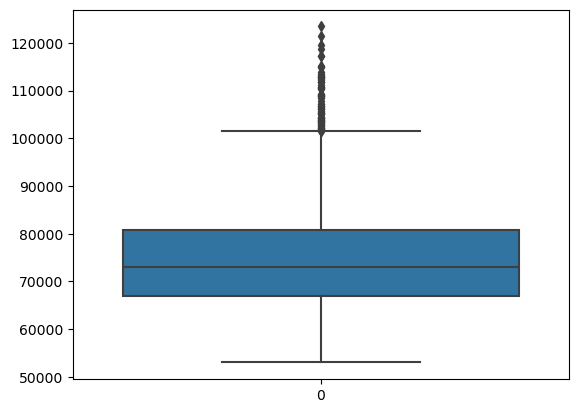

In [11]:
sns.boxplot(df.CTC)

In [12]:
q3=df.CTC.quantile(0.75)
q1=df.CTC.quantile(0.25)
iqr=q3-q1
he=q3+1.5*iqr
le=q1-1.5*iqr
print(f'higher end = {he}')

higher end = 101510.34100148747


In [13]:
CTC_outliers=df[df.CTC>101510.34100148747].index

In [14]:
CTC_outliers

Int64Index([  14,   29,   30,   34,   38,   39,   55,   82,   84,   94,  109,
             123,  175,  185,  242,  251,  252,  254,  256,  265,  271,  281,
             288,  314,  322,  328,  330,  338,  420,  421,  422,  488,  543,
             549,  577,  615,  621,  623,  665,  668,  677,  682,  738,  739,
             742,  819,  845,  852,  856,  860,  883,  893,  901,  947,  951,
             953,  958,  980, 1049, 1062, 1070, 1096, 1111, 1122, 1146, 1186,
            1218, 1230, 1240, 1241, 1249, 1284, 1288, 1300, 1303, 1323],
           dtype='int64')

In [15]:
df=df.drop(CTC_outliers,axis=0)

In [16]:
df.shape

(1262, 8)

<Axes: >

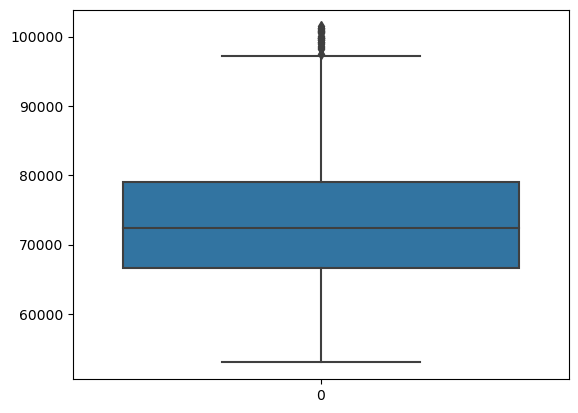

In [17]:
sns.boxplot(df.CTC)

## 2. Data Visualization

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='CTC', ylabel='Density'>

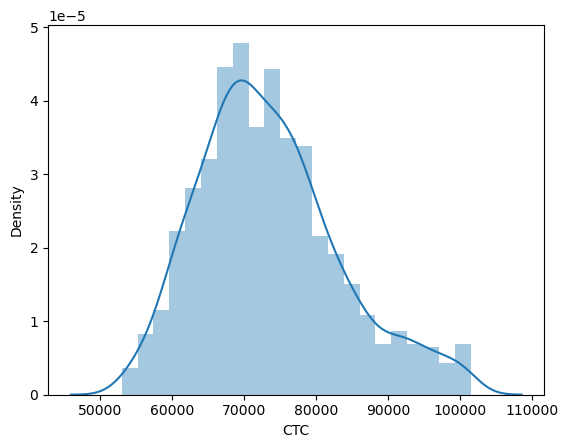

In [19]:
sns.distplot(df.CTC)

### The target variable is normally distributed

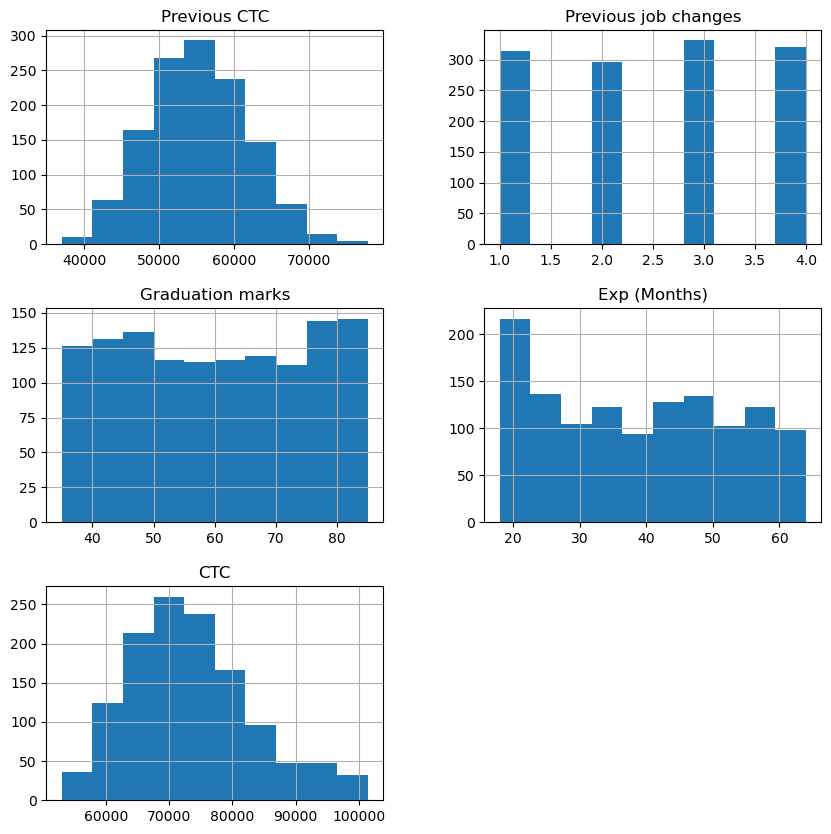

In [20]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

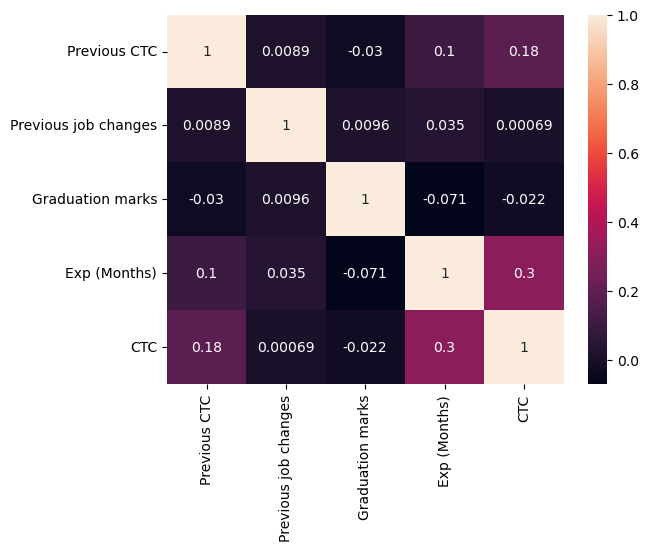

In [21]:
sns.heatmap(df.corr(),annot=True)

### Experience is highly positively correlated to the CTC

In [67]:
df_cat_features=df.select_dtypes(include='object')
df_cat_features.columns

Index(['College', 'Role', 'City type'], dtype='object')

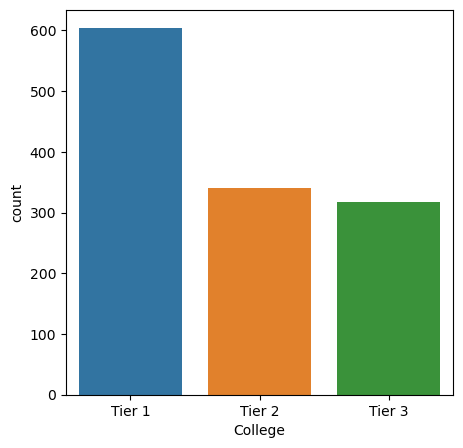

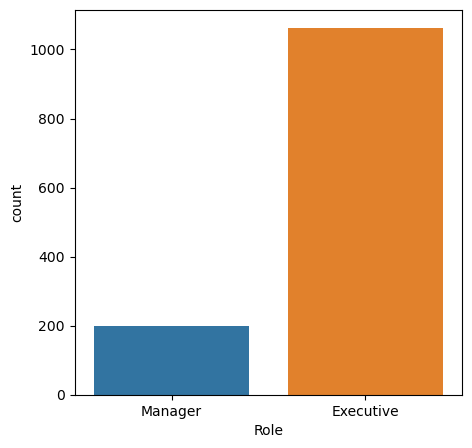

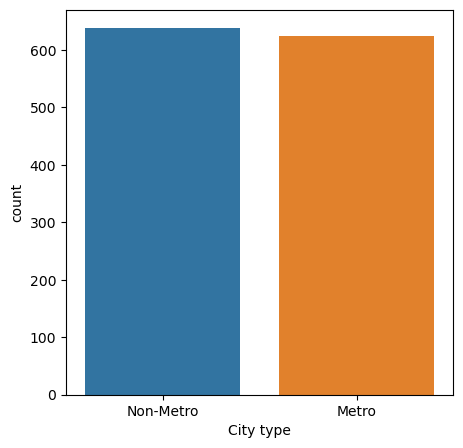

In [68]:
for i in df_cat_features:
    plt.figure(figsize=(5,5))
    sns.countplot(data=df,x=i)
    plt.show()

### It is seen that most of the people are from Tier 1 colleges
### More number of people are executives
### Not much of a difference is found in metro and non-metro cities count. This means that people are equally distributed in both types of cities

In [72]:
df_num_features=df.select_dtypes(include=['float','int'])
df_num_features.columns
df_num_features.drop('CTC',axis=1,inplace=True)
df_num_features.columns


Index(['Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)'],
      dtype='object')

In [84]:
df['Previous CTC'].dtypes

dtype('int64')

<Axes: xlabel='Previous CTC', ylabel='Density'>

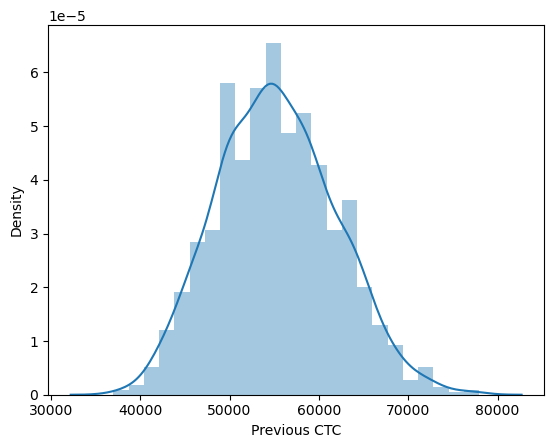

In [89]:
sns.distplot(df['Previous CTC'])

<Axes: xlabel='Previous job changes', ylabel='Density'>

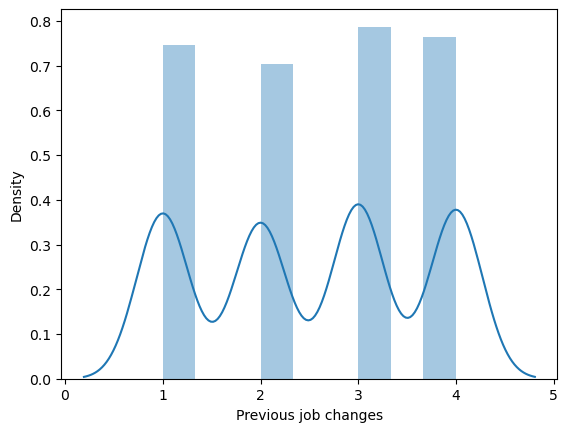

In [90]:
sns.distplot(df['Previous job changes'])

<Axes: xlabel='Graduation marks', ylabel='Density'>

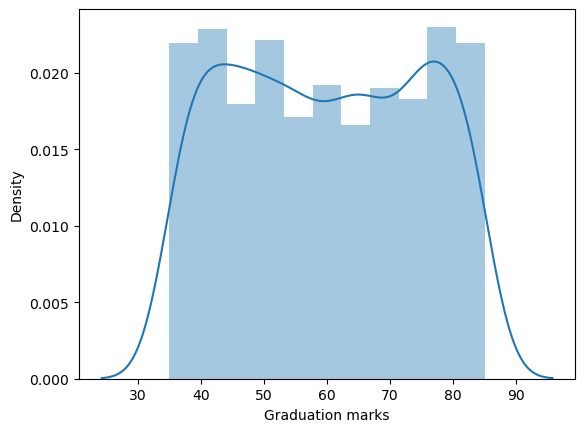

In [91]:

sns.distplot(df['Graduation marks'])

<Axes: xlabel='Exp (Months)', ylabel='Density'>

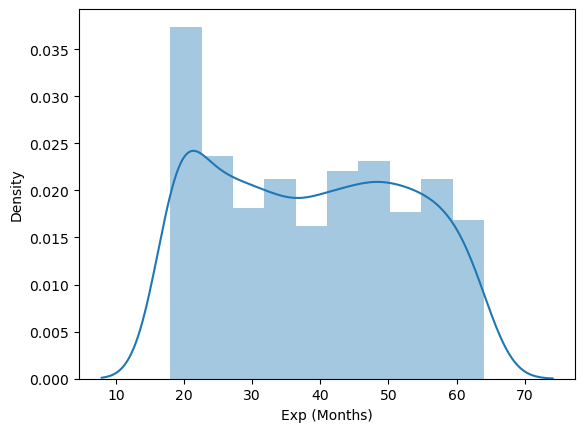

In [92]:
sns.distplot(df['Exp (Months)'])

In [22]:
df.columns

Index(['College', 'Role', 'City type', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)', 'CTC'],
      dtype='object')

In [23]:
pivot_data_college=pd.pivot_table(data=df,index=['College'],values=['CTC'],aggfunc=['mean'])

In [24]:
pivot_data_college

,mean
,CTC
College,
Tier 1,75269.275706
Tier 2,72368.546177
Tier 3,71305.733825


In [25]:
pivot_data_college.index

Index(['Tier 1', 'Tier 2', 'Tier 3'], dtype='object', name='College')

<BarContainer object of 3 artists>

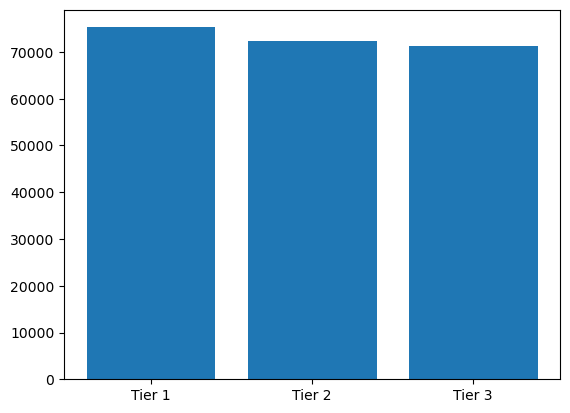

In [26]:
plt.bar(pivot_data_college.index,[75269.275706,72368.546177,71305.733825])

<Axes: xlabel='Graduation marks', ylabel='CTC'>

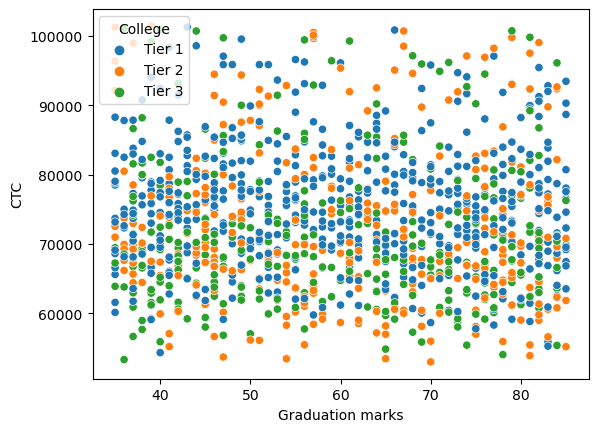

In [223]:
sns.scatterplot(x=df['Graduation marks'],y=df.CTC,hue=df['College'])

### The average salary of people from Tier 1 colleges is slightly more than the others

In [27]:
pivot_data_role=pd.pivot_table(data=df,index=['Role'],values=['CTC'],aggfunc=['mean'])

In [28]:
pivot_data_role

,mean
,CTC
Role,
Executive,71414.382209
Manager,84505.488386


<BarContainer object of 2 artists>

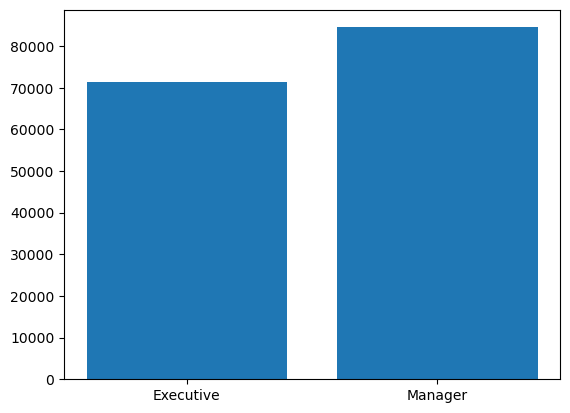

In [29]:
plt.bar(pivot_data_role.index,[71414.382209,84505.488386])

### The average salary of the managers are more than the executives

In [30]:
pivot_data_city=pd.pivot_table(data=df,index=['City type'],values=['CTC'],aggfunc=['mean'])
pivot_data_city

,mean
,CTC
City type,
Metro,75603.727766
Non-Metro,71420.760905


<BarContainer object of 2 artists>

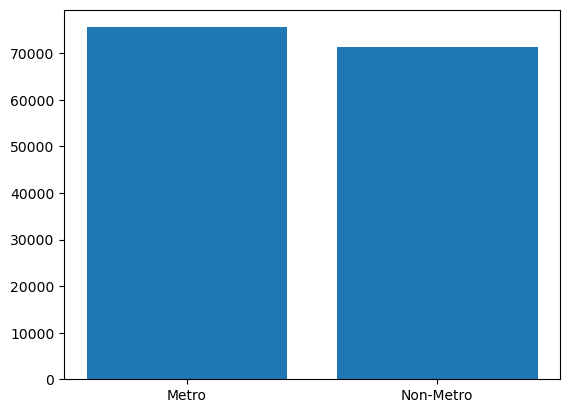

In [31]:
plt.bar(pivot_data_city.index,[75603.727766,71420.760905])

<Axes: xlabel='Exp (Months)', ylabel='CTC'>

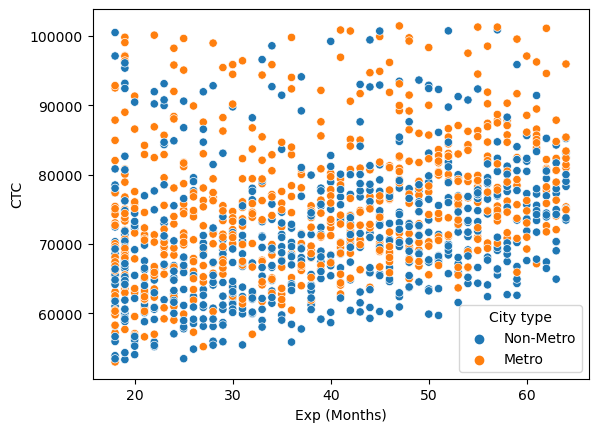

In [222]:
sns.scatterplot(x=df['Exp (Months)'],y=df.CTC,hue=df['City type'])

### The average salary for people is metro cities is more than people in non-metro cities

In [33]:
df[df['CTC']==df['CTC'].max()]

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
1022,Tier 2,Manager,Metro,65622,1,39,47,101451.109213


In [34]:
df[df['CTC']==df['CTC'].min()]

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
442,Tier 2,Executive,Metro,68011,2,70,18,53020.319026


<Axes: xlabel='Previous CTC', ylabel='CTC'>

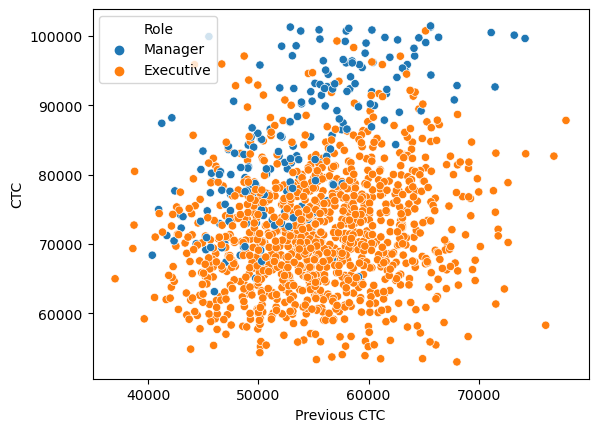

In [94]:
sns.scatterplot(x=df['Previous CTC'],y=df.CTC,hue=df['Role'])

### Less number of people are Managers with more salary

In [36]:
df.columns

Index(['College', 'Role', 'City type', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)', 'CTC'],
      dtype='object')

In [219]:
pivot_data_job=pd.pivot_table(data=df,index=['Previous job changes'],values=['CTC'],aggfunc=['mean'])
pivot_data_job

,mean
,CTC
Previous job changes,
1,73676.840245
2,73031.471524
3,73744.019460
4,73464.354311


### The salary for number of changes in job is the same

<Axes: xlabel='Previous job changes', ylabel='CTC'>

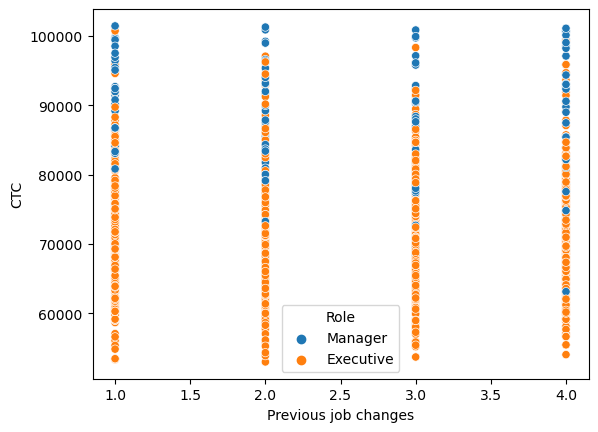

In [221]:
sns.scatterplot(x=df['Previous job changes'],y=df.CTC,hue=df['Role'])

<Axes: xlabel='Exp (Months)', ylabel='CTC'>

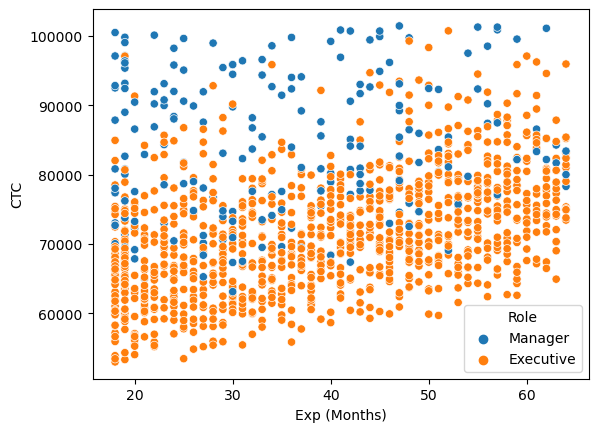

In [178]:
sns.scatterplot(x=df['Exp (Months)'],y=df.CTC,hue=df['Role'])

### There is a positive trend in the salaries of the executives over the years where as in the case of the manager, though the salary is high, it is stagnated

### By using all the visualisation given above, we can state that there is no strong relationship between the attributes and the CTC

## 3. Test train split

In [40]:
num_features=df.dtypes[df.dtypes!='object'].index
cat_features=df.dtypes[df.dtypes=='object'].index

In [41]:
num_col=df[num_features]
num_col

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,55523,3,66,19,71406.576531
1,57081,1,84,18,68005.870631
2,60347,2,52,28,76764.020277
3,49010,2,81,33,82092.386880
4,57879,4,74,32,73878.097729
...,...,...,...,...,...
1333,59661,4,68,50,69712.403655
1334,53714,1,67,18,69298.750099
1335,61957,1,47,18,66397.770686
1336,53203,3,69,21,64044.382949


In [42]:
num_col=num_col.drop('CTC',axis=1)

In [179]:
sc = StandardScaler()
scaled=sc.fit_transform(num_col)
scaled_df=pd.DataFrame(scaled,columns=num_col.columns)

In [181]:
scaled_df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0.042096,0.426373,0.409966,-1.412417
1,0.277104,-1.358312,1.615194,-1.483758
2,0.769746,-0.465970,-0.527433,-0.770342
3,-0.940323,-0.465970,1.414323,-0.413634
4,0.397474,1.318716,0.945623,-0.484976


In [182]:
scaled_df.shape

(1262, 4)

In [183]:
cat_col=df[cat_features]
cat_col

,College,Role,City type
0,Tier 1,Manager,Non-Metro
1,Tier 2,Executive,Metro
2,Tier 2,Executive,Metro
3,Tier 3,Executive,Metro
4,Tier 3,Executive,Metro
...,...,...,...
1333,Tier 3,Executive,Metro
1334,Tier 1,Executive,Non-Metro
1335,Tier 2,Executive,Non-Metro
1336,Tier 1,Executive,Non-Metro


In [184]:
dummy=pd.get_dummies(cat_col,drop_first=True)

In [185]:
dummy.head()

,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,0,0,1,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [186]:
dummy.shape

(1262, 4)

In [187]:
dummy.isnull().sum()

College_Tier 2         0
College_Tier 3         0
Role_Manager           0
City type_Non-Metro    0
dtype: int64

In [188]:
df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [189]:
scaled_df = scaled_df.reset_index(drop=True)

In [190]:
dummy = dummy.reset_index(drop=True)

In [191]:
dummy.tail()

,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
1257,0,1,0,0
1258,0,0,0,1
1259,1,0,0,1
1260,0,0,0,1
1261,0,1,1,1


In [192]:
pd.concat([dummy,scaled_df],axis=1)

,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0,0,1,1,0.042096,0.426373,0.409966,-1.412417
1,1,0,0,0,0.277104,-1.358312,1.615194,-1.483758
2,1,0,0,0,0.769746,-0.465970,-0.527433,-0.770342
3,0,1,0,0,-0.940323,-0.465970,1.414323,-0.413634
4,0,1,0,0,0.397474,1.318716,0.945623,-0.484976
...,...,...,...,...,...,...,...,...
1257,0,1,0,0,0.666270,1.318716,0.543881,0.799173
1258,0,0,0,1,-0.230773,-1.358312,0.476923,-1.483758
1259,1,0,0,1,1.012598,-1.358312,-0.862219,-1.483758
1260,0,0,0,1,-0.307852,0.426373,0.610838,-1.269733


In [193]:
merge=pd.concat([dummy,scaled_df],axis=1)

In [194]:
merge

,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0,0,1,1,0.042096,0.426373,0.409966,-1.412417
1,1,0,0,0,0.277104,-1.358312,1.615194,-1.483758
2,1,0,0,0,0.769746,-0.465970,-0.527433,-0.770342
3,0,1,0,0,-0.940323,-0.465970,1.414323,-0.413634
4,0,1,0,0,0.397474,1.318716,0.945623,-0.484976
...,...,...,...,...,...,...,...,...
1257,0,1,0,0,0.666270,1.318716,0.543881,0.799173
1258,0,0,0,1,-0.230773,-1.358312,0.476923,-1.483758
1259,1,0,0,1,1.012598,-1.358312,-0.862219,-1.483758
1260,0,0,0,1,-0.307852,0.426373,0.610838,-1.269733


In [195]:
merge.isnull().sum()

College_Tier 2          0
College_Tier 3          0
Role_Manager            0
City type_Non-Metro     0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
dtype: int64

In [196]:
X=merge
y=df['CTC']

In [197]:
y.shape

(1262,)

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## 4. Model(s) building

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [200]:
algos = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
names = ['Linear Regression', 'Decision Tree Regression','RandomForestRegressor']
rmse_list = []
r2_s = []
r2_t=[]

In [201]:
from sklearn import metrics

for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_train = r2_score(y_train,y_train_pred)
    r2_t.append(r2_train)
    r2 = r2_score(y_test,y_pred)
    r2_s.append(r2)

In [202]:
evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list,'r2_Score Train':r2_t, 'r2_Score': r2_s,})

In [203]:
evaluation

,Model,RMSE,r2_Score Train,r2_Score
0,Linear Regression,7104.774036,0.482871,0.492423
1,Decision Tree Regression,10064.901131,1.000000,-0.018639
2,RandomForestRegressor,7163.906787,0.922708,0.483939


### Since RandomForestRegressor is giving a better result,we will be enhancing this model of ours. This model is overfitted. So let's improve it a bit

## 5. Enhancing the best model

In [210]:
# Define the hyperparameters and their respective distributions

param_dist = {
    'n_estimators': [100, 200, 300,400,500,600],
    'max_depth': [10, 20, 30,40,50,60],
    'min_samples_split': [2, 5, 10,20,30],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['sqrt', 'log2']}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 30}


In [211]:
model2 = RandomForestRegressor(n_estimators = 300,min_samples_split =20, min_samples_leaf=8,max_features ='sqrt',max_depth =30)

In [212]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [224]:
y_train_pred

array([79714.46184178, 76830.86424547, 72047.96655574, ...,
       74338.18758921, 72464.08797438, 71737.5908231 ])

In [225]:
y_test_pred

array([66891.52899335, 75888.11429956, 69348.04348628, 65004.40130276,
       66973.63431075, 87008.72727388, 74547.1714352 , 68664.68705856,
       75181.55592946, 70714.92237742, 74705.55467557, 78004.54289472,
       67519.16331612, 77162.87483944, 71888.41030601, 84434.37133605,
       70473.08504258, 76650.99361058, 66330.92608992, 78478.90541549,
       67186.52918244, 73354.10370307, 72836.52470896, 65790.13139056,
       78440.39188097, 76104.17048212, 81375.55491383, 70239.33766934,
       85879.5108727 , 69043.04957394, 72263.38836265, 75784.86474789,
       70380.29794312, 67534.32657651, 75447.90668346, 80186.87301338,
       71287.73009174, 76000.09747928, 80633.79687985, 80077.30860417,
       64910.67045649, 74687.27824124, 76767.62683727, 75277.04231295,
       73789.13848366, 66424.51023369, 76249.22981084, 77177.44223726,
       78747.56200775, 80280.16005082, 69460.52438041, 77871.89542751,
       72143.81887192, 74402.06962782, 73322.22065973, 71539.19801679,
      

In [215]:
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [216]:
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')

MSE_y_train =42103377.272312775
MSE_y_test =53438422.36105941


In [217]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =6488.711526359665
RMSE_y_test =7310.1588464998085


In [218]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.5625836272970168
test_r-squared =0.4626529329977658


### Hence, the Random Forest Regressor model states that it gives an accuracy of 46.2% for predicting the CTC of the people